In [68]:
from keras.datasets import mnist

In [69]:
#ge tthe train and test images
(X_train,y_train),(X_test,y_test) =mnist.load_data()


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

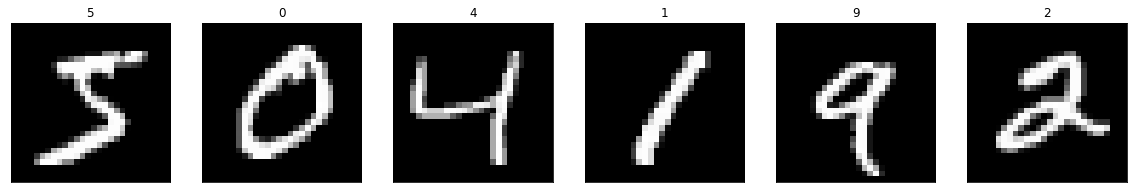

In [71]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    #show the images from x_train 
    ax.imshow(X_train[i],cmap='gray')
    #print the title as the label of the image
    ax.set_title(str(y_train[i]))

In [72]:
#rescale images from 0-255 to 0-1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [73]:
from keras.utils import np_utils
print('Integer values labels')
print(y_train[:10])

Integer values labels
[5 0 4 1 9 2 1 3 1 4]


In [74]:
#one hot encode these labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [75]:
print('One hot labels: ',y_train[:10])

One hot labels:  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [76]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [77]:
from keras.layers.core import Dropout
model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()


In [78]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [79]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,save_best_only=True)

In [80]:
#check the model validation scores on 10 epochs and record the value of the weights at the epochs where the validation error is least
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks =[checkpointer],verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 0.2739 - acc: 0.9156 - val_loss: 0.1214 - val_acc: 0.9635
Epoch 2/10
48000/48000 [==============================] - 8s - loss: 0.1104 - acc: 0.9665 - val_loss: 0.0943 - val_acc: 0.9710
Epoch 3/10
48000/48000 [==============================] - 8s - loss: 0.0809 - acc: 0.9754 - val_loss: 0.0852 - val_acc: 0.9763
Epoch 4/10
48000/48000 [==============================] - 9s - loss: 0.0631 - acc: 0.9807 - val_loss: 0.1002 - val_acc: 0.9748
Epoch 5/10
48000/48000 [==============================] - 9s - loss: 0.0509 - acc: 0.9850 - val_loss: 0.1030 - val_acc: 0.9752
Epoch 6/10
48000/48000 [==============================] - 9s - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0941 - val_acc: 0.9769
Epoch 7/10
48000/48000 [==============================] - 9s - loss: 0.0397 - acc: 0.9882 - val_loss: 0.1072 - val_acc: 0.9772
Epoch 8/10
48000/48000 [==============================] - 11s

In [81]:
#set the model weights to the best epoch weight that we got from the previous compile call
model.load_weights('mnist.model.best.hdf5')


In [82]:
score=model.evaluate(X_test,y_test,verbose=0)

acc=100*score[1]
print("Test Accuracy: %.4f%%" %acc)

Test Accuracy: 97.7900%
